# Forage Virtual Internship - British Airways Data Science Project (Task 2)

---

## Section 1: Exploratory Data Analysis

First, we will explore the data in order to better understand what we have and the statistical properties of the dataset.

In [21]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings('ignore')

The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [4]:
df = pd.read_csv("/Users/srinidhi/Desktop/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [6]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [7]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [8]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

In [9]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


In [171]:
mod_df = df.drop_duplicates()
mod_df.shape

(49281, 14)

In [55]:
df.shape[0] - mod_df.shape[0]

719

719 duplicates removed from our dataset

In [155]:
#to check how many variables have the same value for all observations
mod_df.nunique()[lambda x: x == 1] 

Series([], dtype: int64)

In [156]:
#to check which variable has 1 or more missing value
vars_with_na = [var for var in mod_df.columns if mod_df[var].isnull().sum() > 0]
print (vars_with_na)
print(len(vars_with_na))

[]
0


In [157]:
numerical_columns = mod_df.select_dtypes(include=['number'])
corr = numerical_columns.corr().abs()
corr_upper = corr.where(np.triu(np.ones(corr.shape),k=1).astype(bool))

In [158]:
#to find the position indexes of variables with correlation more than 0.7 (variables with correlation above 0.7 are considered to have strong correlation)
row_position, col_position = np.where((corr_upper > 0.9))

# Check if there are any elements
if len(row_position) == 0:
    print("None")
else:
    # Print the positions
    for row, col in zip(row_position, col_position):
        print(f"({row}, {col})")

None


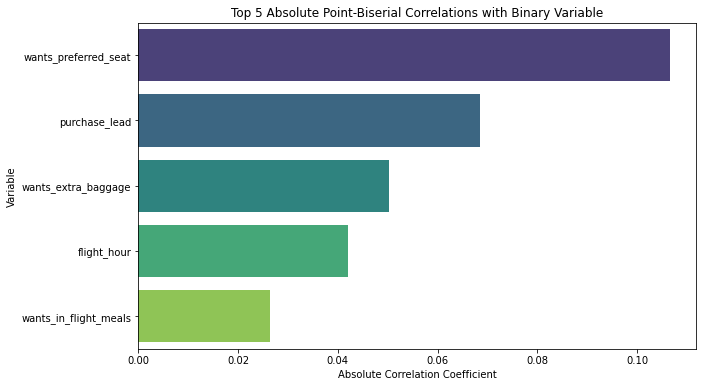

In [181]:
from scipy.stats import pointbiserialr

# Ensure that numerical_columns contains only numeric columns
numerical_columns = numerical_columns.select_dtypes(include='number')

# Initialize empty lists to store results
correlation_coefficients = []
p_values = []

# Calculate point-biserial correlation for each numerical variable with 'booking_complete'
for col in numerical_columns.columns:
    if col != 'booking_complete':  # Exclude 'booking_complete' from calculation
        correlation_result = pointbiserialr(numerical_columns[col], numerical_columns['booking_complete'])
        correlation_coefficients.append(correlation_result.correlation)
        p_values.append(correlation_result.pvalue)

# Create a DataFrame to store the correlation coefficients and p-values
correlation_df = pd.DataFrame({'Variable': numerical_columns.columns.difference(['booking_complete']),  # Exclude 'booking_complete' from columns
                               'Abs_Correlation': np.abs(correlation_coefficients),
                               'P-Value': p_values})

# Sort the DataFrame by absolute correlation in descending order
correlation_df = correlation_df.sort_values(by='Abs_Correlation', ascending=False)

# Select only the top 5 correlations
top_5_corr = correlation_df.head(5)

# Plot the absolute correlation coefficients for the top 5
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Correlation', y='Variable', data=top_5_corr, palette='viridis')
plt.title('Top 5 Absolute Point-Biserial Correlations with Binary Variable')
plt.xlabel('Absolute Correlation Coefficient')
plt.show()

## Section 2: Visualization

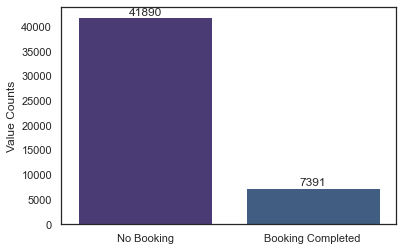

In [220]:
value_counts = mod_df['booking_complete'].value_counts()

# Set Seaborn style and color palette
sns.set(style="white")
sns.set_palette("viridis")  # You can choose a different palette if needed

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=value_counts.index, y=value_counts.values)

# Add value counts above the bars with horizontal y-axis labels
for i, count in enumerate(value_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', rotation=0) 

# Set ylabel
plt.ylabel('Value Counts')
plt.xlabel('')

new_labels = ['No Booking', 'Booking Completed']
plt.xticks(range(len(new_labels)), new_labels, rotation=0)

# Show the plot
plt.show()

imbalanced y dataset --> so we will use f1

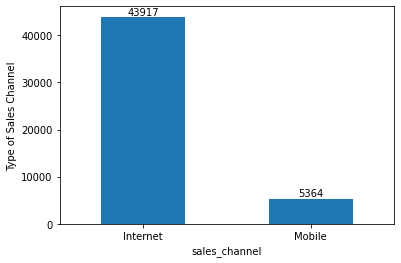

In [163]:
value_counts = mod_df['sales_channel'].value_counts()

# Create a bar plot
ax = value_counts.plot(kind='bar')

# Add value counts above the bars with horizontal y-axis labels
for i, count in enumerate(value_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', rotation=0)  # Set rotation to 0 for horizontal labels

# Set ylabel
plt.ylabel('Type of Sales Channel')

# Rotate x-axis tick labels to be horizontal
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [172]:
# Assuming df is your DataFrame and 'column_to_encode' is the column with 'Internet' and 'Mobile'
mod_df['sales_channel'] = mod_df['sales_channel'].map({'Internet': 1, 'Mobile': 2})

mod_df["sales_channel"].unique()

array([1, 2])

In [166]:
mod_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,1,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,1,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0


In [173]:
# Assuming df is your DataFrame and 'column_to_encode' is the column with 'Internet' and 'Mobile'
mod_df['trip_type'] = mod_df['trip_type'].map({'RoundTrip': 1, 'OneWay': 2, 'CircleTrip': 3})

mod_df["trip_type"].unique()

array([1, 3, 2])

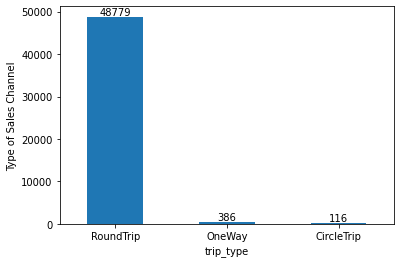

In [59]:
value_counts = mod_df['trip_type'].value_counts()

# Create a bar plot
ax = value_counts.plot(kind='bar')

# Add value counts above the bars with horizontal y-axis labels
for i, count in enumerate(value_counts):
    ax.text(i, count + 0.1, str(count), ha='center', va='bottom', rotation=0)  # Set rotation to 0 for horizontal labels

# Set ylabel
plt.ylabel('Type of Sales Channel')

# Rotate x-axis tick labels to be horizontal
plt.xticks(rotation=0)

# Show the plot
plt.show()

In [50]:
mod_df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,saleschannel_encoded,triptype_encoded
0,2,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0,1,1.0
1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0,1,1.0
2,2,243,22,17,3,AKLDEL,India,1,1,0,5.52,0,1,1.0
3,1,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0,1,1.0
4,2,68,22,15,3,AKLDEL,India,1,0,1,5.52,0,1,1.0


In [34]:
mod_df['route'].nunique()

799

In [179]:
pd.set_option('display.max_rows', None)
mod_df['route'].value_counts()

route
0    49281
Name: count, dtype: int64

In [80]:
unique_value_counts = mod_df['route'].value_counts()

# Filter for values that appear only once
values_appearing_once = unique_value_counts[unique_value_counts == 1]

# Display the count and the values that appear only once
print("Number of values appearing only once:", len(values_appearing_once))
print("Values appearing only once:", values_appearing_once.index.tolist())

Number of values appearing only once: 64
Values appearing only once: ['COKCTS', 'BBIPER', 'CTUSRG', 'KTMTWU', 'CMBWUH', 'CMBCTS', 'BBIMEL', 'CKGLOP', 'BKIMRU', 'CCUMRU', 'KIXLBU', 'KBRWUH', 'CSXSYD', 'CNXXIY', 'MELNRT', 'BTUWUH', 'MRUTPE', 'TPEURT', 'DACPUS', 'CSXMRU', 'HKTJED', 'HKTIKA', 'URTXIY', 'AORPER', 'CKGHKT', 'BTJJED', 'JEDMFM', 'BTUCKG', 'DELKBR', 'CXRMEL', 'KNOKTM', 'BDOWUH', 'KOSMEL', 'PEKSGN', 'KOSSYD', 'KTMURT', 'HKGJED', 'MELSZX', 'MELVTE', 'MELWUH', 'LBUTPE', 'KBRXIY', 'OOLWUH', 'PERSWA', 'PERVTE', 'CKGSGN', 'KCHMRU', 'JOGKTM', 'ICNJED', 'HDYHGH', 'CNXDEL', 'HDYKTM', 'CKGKNO', 'SGNXIY', 'AORPUS', 'IKAKCH', 'DACMRU', 'KNOWUH', 'IKALOP', 'AKLHGH', 'JEDPDG', 'JEDPEN', 'DACPEK', 'MRUXIY']


In [176]:
category_values = {'AKLKUL': 1}

# Map 'trip_type' to values, setting all other categories to 0
mod_df['route'] = mod_df['route'].map(category_values).fillna(0).astype(int)



array([0])

In [175]:
mod_df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,0,New Zealand,1,0,0,5.52,0
1,1,1,1,112,20,3,6,0,New Zealand,0,0,0,5.52,0
2,2,1,1,243,22,17,3,0,India,1,1,0,5.52,0
3,1,1,1,96,31,4,6,0,New Zealand,0,0,1,5.52,0
4,2,1,1,68,22,15,3,0,India,1,0,1,5.52,0


In [33]:
mod_df['booking_origin'].nunique()

104

In [85]:
mod_df['booking_origin'].value_counts()

booking_origin
Australia               17691
Malaysia                 7055
South Korea              4502
Japan                    3819
China                    3284
Indonesia                2317
Taiwan                   2042
Thailand                 1993
India                    1258
New Zealand              1060
Singapore                1034
United States             453
Vietnam                   386
Macau                     301
Hong Kong                 294
Philippines               265
United Kingdom            173
Brunei                    161
Cambodia                  131
(not set)                  78
Sri Lanka                  73
Italy                      58
France                     58
Canada                     57
Germany                    54
Myanmar (Burma)            51
Netherlands                45
Mauritius                  43
United Arab Emirates       42
Nepal                      39
Bangladesh                 36
Saudi Arabia               35
Russia                   

In [86]:
country_to_continent = {
    'Australia': 'Australia',
    'Malaysia': 'Asia',
    'South Korea': 'Asia',
    'Japan': 'Asia',
    'China': 'Asia',
    'Indonesia': 'Asia',
    'Taiwan': 'Asia',
    'Thailand': 'Asia',
    'India': 'Asia',
    'New Zealand': 'Australia',
    'Singapore': 'Asia',
    'United States': 'North America',
    'Vietnam': 'Asia',
    'Macau': 'Asia',
    'Hong Kong': 'Asia',
    'Philippines': 'Asia',
    'United Kingdom': 'Europe',
    'Brunei': 'Asia',
    'Cambodia': 'Asia',
    'Sri Lanka': 'Asia',
    'Italy': 'Europe',
    'France': 'Europe',
    'Canada': 'North America',
    'Germany': 'Europe',
    'Myanmar (Burma)': 'Asia',
    'Netherlands': 'Europe',
    'Mauritius': 'Africa',
    'United Arab Emirates': 'Asia',
    'Nepal': 'Asia',
    'Bangladesh': 'Asia',
    'Saudi Arabia': 'Asia',
    'Russia': 'Europe',
    'Spain': 'Europe',
    'Laos': 'Asia',
    'Switzerland': 'Europe',
    'Chile': 'South America',
    'Qatar': 'Asia',
    'Iran': 'Asia',
    'Sweden': 'Europe',
    'Réunion': 'Africa',
    'Mexico': 'North America',
    'Kuwait': 'Asia',
    'Oman': 'Asia',
    'Brazil': 'South America',
    'Turkey': 'Asia',
    'Mongolia': 'Asia',
    'Austria': 'Europe',
    'Poland': 'Europe',
    'Czech Republic': 'Europe',
    'Finland': 'Europe',
    'Ireland': 'Europe',
    'Maldives': 'Asia',
    'Denmark': 'Europe',
    'Belgium': 'Europe',
    'Greece': 'Europe',
    'Argentina': 'South America',
    'New Caledonia': 'Australia',
    'Portugal': 'Europe',
    'Ukraine': 'Europe',
    'Norway': 'Europe',
    'Bahrain': 'Asia',
    'Peru': 'South America',
    'Colombia': 'South America',
    'Romania': 'Europe',
    'South Africa': 'Africa',
    'Kenya': 'Africa',
    'Kazakhstan': 'Asia',
    'Hungary': 'Europe',
    'Israel': 'Asia',
    'Slovenia': 'Europe',
    'Solomon Islands': 'Australia',
    'Guam': 'Australia',
    'Timor-Leste': 'Asia',
    'Cyprus': 'Asia',
    'Croatia': 'Europe',
    'Tunisia': 'Africa',
    'Vanuatu': 'Australia',
    'Czechia': 'Europe',
    'Malta': 'Europe',
    'Gibraltar': 'Europe',
    'Belarus': 'Europe',
    'Pakistan': 'Asia',
    'Iraq': 'Asia',
    'Ghana': 'Africa',
    'Seychelles': 'Africa',
    'Guatemala': 'North America',
    'Algeria': 'Africa',
    'Afghanistan': 'Asia',
    'Lebanon': 'Asia',
    'Estonia': 'Europe',
    'Paraguay': 'South America',
    'Papua New Guinea': 'Australia',
    'Jordan': 'Asia',
    'Egypt': 'Africa',
    'Nicaragua': 'North America',
    'Slovakia': 'Europe',
    'Norfolk Island': 'Australia',
    'Bhutan': 'Asia',
    'Panama': 'North America',
    'Tonga': 'Australia',
    'Tanzania': 'Africa',
    'Bulgaria': 'Europe',
    'Svalbard & Jan Mayen': 'Europe',
}

In [97]:
mod_df['bookingorigin_encoded'] = mod_df['booking_origin'].map(country_to_continent)

category_values = {'Australia': 1, 'Asia': 2, 'North America': 3, 'South America': 4, 'Europe': 5, 'Africa': 6, 'Antartica': 7}

# Map 'trip_type' to values, setting all other categories to 0
mod_df['bookingorigin_encoded'] = mod_df['bookingorigin_encoded'].map(category_values).fillna(0).astype(int)

# Optionally, drop the original 'country' column
mod_df = mod_df.drop('booking_origin', axis=1)

mod_df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,saleschannel_encoded,triptype_encoded,route_encoded,bookingorigin_encoded
0,2,262,19,7,6,1,0,0,5.52,0,1,1,0,1
1,1,112,20,3,6,0,0,0,5.52,0,1,1,0,1
2,2,243,22,17,3,1,1,0,5.52,0,1,1,0,2
3,1,96,31,4,6,0,0,1,5.52,0,1,1,0,1
4,2,68,22,15,3,1,0,1,5.52,0,1,1,0,2


In [98]:
y = mod_df['booking_complete']
x = mod_df.drop('booking_complete', axis=1)

In [102]:
mod_df.head()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,saleschannel_encoded,triptype_encoded,route_encoded,bookingorigin_encoded
0,2,262,19,7,6,1,0,0,5.52,0,1,1,0,1
1,1,112,20,3,6,0,0,0,5.52,0,1,1,0,1
2,2,243,22,17,3,1,1,0,5.52,0,1,1,0,2
3,1,96,31,4,6,0,0,1,5.52,0,1,1,0,1
4,2,68,22,15,3,1,0,1,5.52,0,1,1,0,2


In [99]:
#split the data into training and testing sets
X_train, X_valid, Y_train, Y_valid = train_test_split(x, y, test_size=0.2)

#standardize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)

Section 3: Model Comparisons

Using accuracy

In [208]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, ExtraTreesClassifier
import xgboost as xgb
from catboost import CatBoostRegressor

# Classifier models
logistic_model = LogisticRegression(random_state=100)
dectree_model = DecisionTreeClassifier(random_state=100)
randforest_model = RandomForestClassifier(random_state=100)
xgboost_model = xgb.XGBClassifier(random_state=100)
extratrees_model = ExtraTreesClassifier(random_state=100)
gradboost_model = GradientBoostingClassifier(random_state=100)
catboost_model = CatBoostRegressor(random_seed=100, verbose=False)


# Accuracy scores
accuracy_logistic = cross_val_score(logistic_model, x, y, cv=5, scoring='accuracy')
print("Accuracy for Logistic Regression Model:", accuracy_logistic.mean())
print()

accuracy_dectree = cross_val_score(dectree_model, x, y, cv=5, scoring='accuracy')
print("Accuracy for Decision Tree Model:", accuracy_dectree.mean())
print()

accuracy_randforest = cross_val_score(randforest_model,x, y, cv=5, scoring='accuracy')
print("Accuracy for Random Forest Model:", accuracy_randforest.mean())
print()

accuracy_xgboost = cross_val_score(xgboost_model, x, y, cv=5, scoring='accuracy')
print("Accuracy for XgBoost Model:", accuracy_xgboost.mean())
print()

accuracy_extratrees = cross_val_score(extratrees_model , x, y, cv=5, scoring='accuracy')
print("Accuracy for Extra Trees Model:", accuracy_extratrees.mean())
print()

accuracy_gradboost = cross_val_score(gradboost_model , x, y, cv=5, scoring='accuracy')
print("Accuracy for GradBoost Model:", accuracy_gradboost.mean())
print()

Accuracy for Logistic Regression Model: 0.8432051839684107

Accuracy for Decision Tree Model: 0.5887016334393514

Accuracy for Random Forest Model: 0.687888604940256

Accuracy for XgBoost Model: 0.6061719582727813

Accuracy for Extra Trees Model: 0.8057864722018369

Accuracy for GradBoost Model: 0.6815980143486928



Using Balanced Accuracy

In [151]:
from sklearn.metrics import make_scorer, balanced_accuracy_score

# Accuracy scores
accuracy_logistic = cross_val_score(logistic_model, x, y, cv=5, scoring=make_scorer(balanced_accuracy_score))
print("Accuracy for Logistic Regression Model:", accuracy_logistic.mean())
print()

accuracy_dectree = cross_val_score(dectree_model, x, y, cv=5, scoring=make_scorer(balanced_accuracy_score))
print("Accuracy for Decision Tree Model:", accuracy_dectree.mean())
print()

accuracy_randforest = cross_val_score(randforest_model,x, y, cv=5, scoring=make_scorer(balanced_accuracy_score))
print("Accuracy for Random Forest Model:", accuracy_randforest.mean())
print()

accuracy_xgboost = cross_val_score(xgboost_model, x, y, cv=5, scoring=make_scorer(balanced_accuracy_score))
print("Accuracy for XgBoost Model:", accuracy_xgboost.mean())
print()

accuracy_extratrees = cross_val_score(extratrees_model , x, y, cv=5, scoring=make_scorer(balanced_accuracy_score))
print("Accuracy for Extra Trees Model:", accuracy_extratrees.mean())
print()

accuracy_gradboost = cross_val_score(gradboost_model , x, y, cv=5, scoring=make_scorer(balanced_accuracy_score))
print("Accuracy for GradBoost Model:", accuracy_gradboost.mean())
print()

Accuracy for Logistic Regression Model: 0.5024532699915742

Accuracy for Decision Tree Model: 0.44490553259806376

Accuracy for Random Forest Model: 0.45114989609683975

Accuracy for XgBoost Model: 0.4652230598979902

Accuracy for Extra Trees Model: 0.5051245877859138

Accuracy for GradBoost Model: 0.4594958572794073



f1 score

In [152]:
from sklearn.metrics import make_scorer, balanced_accuracy_score

# Accuracy scores
accuracy_logistic = cross_val_score(logistic_model, x, y, cv=5, scoring='f1')
print("Accuracy for Logistic Regression Model:", accuracy_logistic.mean())
print()

accuracy_dectree = cross_val_score(dectree_model, x, y, cv=5, scoring='f1')
print("Accuracy for Decision Tree Model:", accuracy_dectree.mean())
print()

accuracy_randforest = cross_val_score(randforest_model,x, y, cv=5, scoring='f1')
print("Accuracy for Random Forest Model:", accuracy_randforest.mean())
print()

accuracy_xgboost = cross_val_score(xgboost_model, x, y, cv=5, scoring='f1')
print("Accuracy for XgBoost Model:", accuracy_xgboost.mean())
print()

accuracy_extratrees = cross_val_score(extratrees_model , x, y, cv=5, scoring='f1')
print("Accuracy for Extra Trees Model:", accuracy_extratrees.mean())
print()

accuracy_gradboost = cross_val_score(gradboost_model , x, y, cv=5, scoring='f1')
print("Accuracy for GradBoost Model:", accuracy_gradboost.mean())
print()

Accuracy for Logistic Regression Model: 0.02799625337159282

Accuracy for Decision Tree Model: 0.154404463020298

Accuracy for Random Forest Model: 0.06365094402308562

Accuracy for XgBoost Model: 0.13247447297173437

Accuracy for Extra Trees Model: 0.10466102377568194

Accuracy for GradBoost Model: 0.0677399293310138



In [153]:

from sklearn.metrics import make_scorer, roc_auc_score

# Accuracy scores
accuracy_logistic = cross_val_score(logistic_model, x, y, cv=5, scoring=make_scorer(roc_auc_score))
print("Accuracy for Logistic Regression Model:", accuracy_logistic.mean())
print()

accuracy_dectree = cross_val_score(dectree_model, x, y, cv=5, scoring=make_scorer(roc_auc_score))
print("Accuracy for Decision Tree Model:", accuracy_dectree.mean())
print()

accuracy_randforest = cross_val_score(randforest_model,x, y, cv=5, scoring=make_scorer(roc_auc_score))
print("Accuracy for Random Forest Model:", accuracy_randforest.mean())
print()

accuracy_xgboost = cross_val_score(xgboost_model, x, y, cv=5, scoring=make_scorer(roc_auc_score))
print("Accuracy for XgBoost Model:", accuracy_xgboost.mean())
print()

accuracy_extratrees = cross_val_score(extratrees_model , x, y, cv=5, scoring=make_scorer(roc_auc_score))
print("Accuracy for Extra Trees Model:", accuracy_extratrees.mean())
print()

accuracy_gradboost = cross_val_score(gradboost_model , x, y, cv=5, scoring=make_scorer(roc_auc_score))
print("Accuracy for GradBoost Model:", accuracy_gradboost.mean())
print()

Accuracy for Logistic Regression Model: 0.5024532699915742

Accuracy for Decision Tree Model: 0.44490553259806376

Accuracy for Random Forest Model: 0.45114989609683975

Accuracy for XgBoost Model: 0.4652230598979902

Accuracy for Extra Trees Model: 0.5051245877859138

Accuracy for GradBoost Model: 0.4594958572794073



Logistic - No penalty

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid for C values
param_grid = {
    'C': [0.1, 0.3, 0.5, 0.7, 1, 3, 5, 7, 10],
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
}

# Create a Logistic Regression model
model = LogisticRegression(penalty='none', random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best estimator (model)
ridge_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred = ridge_model.predict(X_valid)

# Compute accuracy on the validation set
accuracy_ridge = accuracy_score(Y_valid, y_pred)

# Print the best hyperparameters and scores
print("Best C for Ridge Regression:", best_params['C'])
print("Best Solver for Ridge Regression:", best_params['solver'])
print("Best Accuracy on Validation Set for Ridge Regression:", accuracy_ridge)

Best C for Ridge Regression: 0.1
Best Solver for Ridge Regression: newton-cg
Best Accuracy on Validation Set for Ridge Regression: 0.8451861621182916


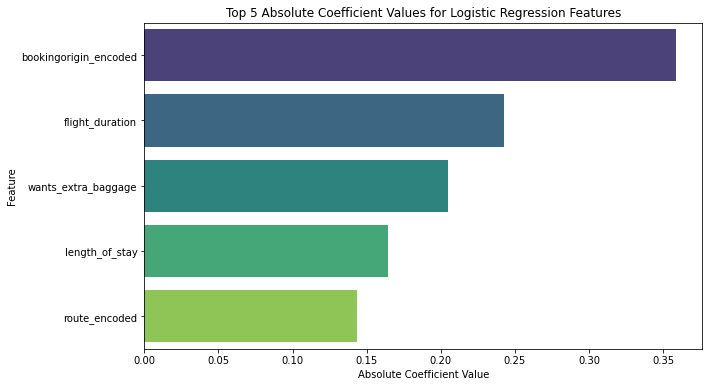

In [184]:
lr_model = LogisticRegression(C = 0.1, solver = 'newton-cg', random_state=42)
lr_model.fit(X_train, Y_train)

# Get feature names from the original data (assuming X_train is a DataFrame)
feature_names = x.columns

# Create a DataFrame to store feature names and their absolute coefficients
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Abs_Coefficient': np.abs(lr_model.coef_[0])})

# Sort the DataFrame by absolute coefficient values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Abs_Coefficient', ascending=False)

# Select the top 10 features
top_features = feature_importance_df.head(5)

# Plot the top 10 feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Coefficient', y='Feature', data=top_features, palette='viridis')
plt.title('Top 5 Absolute Coefficient Values for Logistic Regression Features')
plt.xlabel('Absolute Coefficient Value')
plt.show()

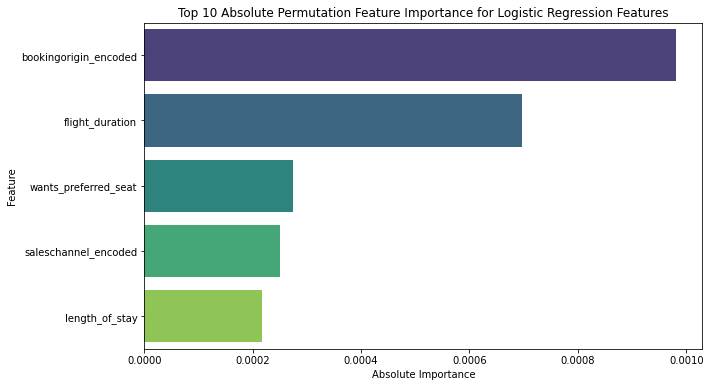

In [187]:
# Create a Logistic Regression model
lr_model = LogisticRegression()

# Fit the model
lr_model.fit(X_train, Y_train)

# Calculate permutation feature importance
perm_importance = permutation_importance(lr_model, X_valid, Y_valid, n_repeats=30, random_state=42)

# Create a DataFrame to store feature names and their absolute importances
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Abs_Importance': np.abs(perm_importance.importances_mean)
})

# Sort the DataFrame by absolute importance values in descending order
feature_importance_df = feature_importance_df.sort_values(by='Abs_Importance', ascending=False)

# Select the top 10 features
top_features = feature_importance_df.head(5)

# Plot the top 10 permutation feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x='Abs_Importance', y='Feature', data=top_features, palette='viridis')
plt.title('Top 10 Absolute Permutation Feature Importance for Logistic Regression Features')
plt.xlabel('Absolute Importance')
plt.show()

Logistic - Ridge

In [188]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the hyperparameter grid for C values
param_grid = {
    'C': [0.1, 0.3, 0.5, 0.7, 1, 3, 5, 7, 10],
    'solver': ['liblinear', 'newton-cg', 'lbfgs'],
}

# Create a Logistic Regression model
model = LogisticRegression(penalty='l2', random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best estimator (model)
ridge_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred = ridge_model.predict(X_valid)

# Compute accuracy on the validation set
accuracy_ridge = accuracy_score(Y_valid, y_pred)
f1_ridge = f1_score(Y_valid, y_pred)

# Print the best hyperparameters and scores
print("Best C for Ridge Regression:", best_params['C'])
print("Best Solver for Ridge Regression:", best_params['solver'])
print("Best Accuracy on Validation Set for Ridge Regression:", accuracy_ridge)
print("Best F1 Score on Validation Set for Ridge Regression:", f1_ridge)


Best C for Ridge Regression: 0.1
Best Solver for Ridge Regression: liblinear
Best Accuracy on Validation Set for Ridge Regression: 0.8451861621182916
Best F1 Score on Validation Set for Ridge Regression: 0.01421188630490956


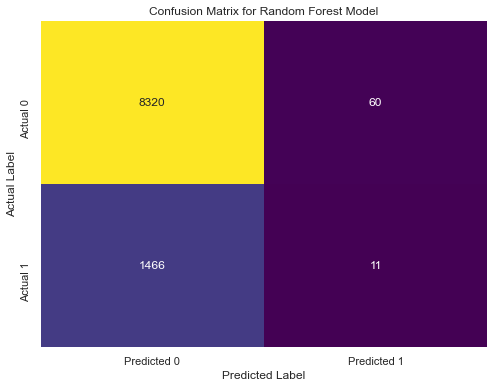

In [225]:
from sklearn.metrics import confusion_matrix

lr_model = LogisticRegression(C = 0.1, solver = 'newton-cg', random_state=42)
lr_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_valid)

# Create a confusion matrix
cm = confusion_matrix(Y_valid, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

Logistic - Lasso

In [189]:
# Define the hyperparameter grid for C values
param_grid = {
    'C': [0.1, 0.3, 0.5, 0.7, 1, 3, 5, 7, 10],
    'max_iter': [100, 200, 300, 400, 500],
}

# Create a Logistic Regression model
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best estimator (model)
lasso_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred = lasso_model.predict(X_valid)

# Compute accuracy and F1 score on the validation set
accuracy_lasso = accuracy_score(Y_valid, y_pred)
f1_lasso = f1_score(Y_valid, y_pred)

# Print the best hyperparameters and scores
print("Best C for Logistic Regression:", best_params['C'])
print("Best Max Iterations for Logistic Regression:", best_params['max_iter']) 

print("Best Accuracy on Validation Set for Logistic Regression:", accuracy_lasso)
print("Best F1 Score on Validation Set for Ridge Regression:", f1_lasso)

Best C for Logistic Regression: 0.1
Best Max Iterations for Logistic Regression: 100
Best Accuracy on Validation Set for Logistic Regression: 0.8451861621182916
Best F1 Score on Validation Set for Ridge Regression: 0.01421188630490956


Logistic - Elastic Net

In [190]:
# Define the hyperparameter grid for C values
param_grid = {
    'C': [0.1, 0.5, 1.0, 2.0, 5.0, 10.0],
    'l1_ratio' : [0.1,0.3,0.5,0.7,0.9] ,
}

# Create a Logistic Regression model
model = LogisticRegression(penalty='elasticnet', solver='saga', random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(model, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to your training data
grid_search.fit(X_train, Y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_

# Get the best estimator (model)
elastic_model = grid_search.best_estimator_

# Make predictions on the validation set using the best model
y_pred = elastic_model.predict(X_valid)

# Compute accuracy and F1 score on the validation set
accuracy_elastic = accuracy_score(Y_valid, y_pred)

# Print the best hyperparameters and scores
print("Best C for Elastic-Net Regression:", best_params['C'])
print("Best L1 Ratio for Elastic-Net Regression:", best_params['l1_ratio']) 

print("Best Accuracy on Validation Set for Elastic-Net Regression:", accuracy_elastic)

f1_elastic = f1_score(Y_valid, y_pred)
print("Best F1 Score on Validation Set for Ridge Regression:", f1_elastic)



Best C for Elastic-Net Regression: 0.1
Best L1 Ratio for Elastic-Net Regression: 0.1
Best Accuracy on Validation Set for Elastic-Net Regression: 0.8451861621182916
Best F1 Score on Validation Set for Ridge Regression: 0.01421188630490956


ExtraTrees Model

In [191]:
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}
# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=extratrees_model, param_grid=param_grid, scoring='accuracy', cv=10, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the validation set
y_pred = best_model.predict(X_valid)
accuracy_extratrees = accuracy_score(Y_valid, y_pred)

# Print the results
print("Best Parameters:", best_params)
print("Best Accuracy on Validation Set for ExtraTrees Model:", accuracy_extratrees)

f1_extra = f1_score(Y_valid, y_pred)
print("Best F1 Score on Validation Set for Ridge Regression:", f1_extra)

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy on Validation Set for ExtraTrees Model: 0.8505630516384295
Best F1 Score on Validation Set for Ridge Regression: 0.017344896597731824


Random Forest Model

In [218]:
param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]}

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=randforest_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

# Get the best parameters and the best model
best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_model.predict(X_valid)
accuracy_randforest = accuracy_score(Y_valid, y_pred)

# Print the results
print("Best Parameters:", best_params)
print("Best Accuracy on Validation Set for Random Forest Model:", accuracy_randforest)

f1_random = f1_score(Y_valid, y_pred)
print("Best F1 Score on Validation Set for Ridge Regression:", f1_random)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Best Accuracy on Validation Set for Random Forest Model: 0.8494470934361368
Best F1 Score on Validation Set for Ridge Regression: 0.05115089514066496


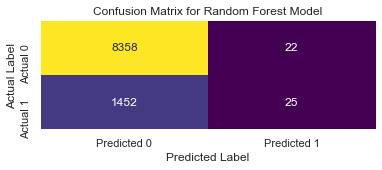

In [229]:
from sklearn.metrics import confusion_matrix

randforest_model = RandomForestClassifier(max_depth= 10, min_samples_leaf= 2, min_samples_split=5, n_estimators=100, random_state=42)
randforest_model.fit(X_train, Y_train)

# Make predictions on the test set
y_pred = randforest_model.predict(X_valid)

# Create a confusion matrix
cm = confusion_matrix(Y_valid, y_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 2))
sns.heatmap(cm, annot=True, fmt='d', cmap='viridis', cbar=False, 
            xticklabels=['Predicted 0', 'Predicted 1'],
            yticklabels=['Actual 0', 'Actual 1'])
plt.title('Confusion Matrix for Random Forest Model')
plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.show()

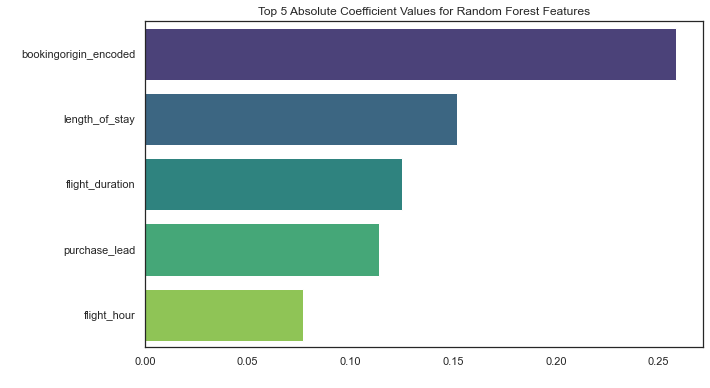

In [217]:
# Create a Random Forest model
randforest_model = RandomForestClassifier(max_depth= 10, min_samples_leaf= 2, min_samples_split=5, n_estimators=100, random_state=42)

# Fit the model to your training data
randforest_model.fit(X_train, Y_train)

# Get feature importances from the trained model
feature_importances =randforest_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Use Seaborn for plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df.head(5), palette='viridis')
plt.title('Top 5 Absolute Coefficient Values for Random Forest Features')
plt.xlabel(' ')
plt.ylabel(' ')
plt.show()

GradBoost Model

In [215]:
# Create a GradientBoostingClassifier
gradboost_model = GradientBoostingClassifier(random_state=42)

param_grid = {
    'n_estimators': [10, 50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5],
}

# Create a GridSearchCV object for Gradient Boosting
grid_search_gradboost = GridSearchCV(estimator=gradboost_model, param_grid=param_grid, scoring='accuracy', cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search_gradboost.fit(X_train, Y_train)

# Get the best parameters and the best model for Gradient Boosting
best_params_gradboost = grid_search_gradboost.best_params_
best_model_gradboost = grid_search_gradboost.best_estimator_

# Evaluate the best model on the validation set
y_pred_gradboost = best_model_gradboost.predict(X_valid)
accuracy_gradboost = accuracy_score(Y_valid, y_pred_gradboost)

# Print the results for Gradient Boosting
print("Best Parameters for Gradient Boosting:", best_params_gradboost)
print("Best Accuracy on Validation Set for Gradient Boosting Model:", accuracy_gradboost)

f1_gradboost = f1_score(Y_valid, y_pred_gradboost)
print("Best F1 Score on Validation Set for Gradient Boosting Model:", f1_gradboost)


Best Parameters for Gradient Boosting: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50}
Best Accuracy on Validation Set for Gradient Boosting Model: 0.8511717561124075
Best F1 Score on Validation Set for Gradient Boosting Model: 0.04429967426710098
